In [1]:
from librosa.effects import pitch_shift, time_stretch

In [1]:
import torch
from IPython.display import Audio

from src.datasets import NoisySpectralSpeechDataset
from src.utils import spectral

USE_CUDA = True

In [2]:
dataset = NoisySpectralSpeechDataset(train=False, quiet=True)

In [21]:
# Sample data
IDX = 2
noisy_arr = dataset.noisy_data[IDX]
clean_arr = dataset.clean_data[IDX]

In [22]:
clean_spec = spectral.audio_to_waveglow_spec(clean_arr)

In [23]:
clean_spec.shape

(80, 186)

In [ ]:
from librosa.display import specshow
import matplotlib.pyplot as plt

def plot_spec(spec, sr):
    plt.figure(figsize=(10, 4))
    specshow(spec, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
    plt.colorbar()
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

In [25]:
clean_aug_spec = clean_spec

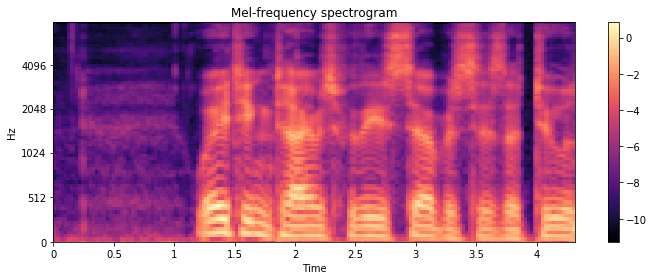

In [26]:
plot_spec(clean_aug_spec)

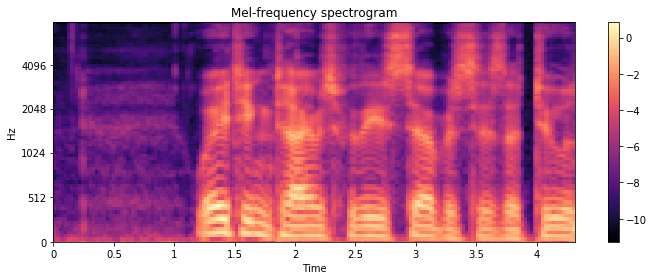

In [27]:
plot_spec(clean_spec)

In [28]:
waveglow = spectral.load_waveglow(use_cuda=True)

Using cache found in /home/matt/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub


In [29]:
def to_audio(spec):
    spec_t = torch.tensor(spec).cuda().view(1, 80, -1)
    return spectral.waveglow_spec_to_audio(spec_t, waveglow)

In [30]:
rec_arr = to_audio(clean_aug_spec)
print(len(rec_arr))
Audio(rec_arr, rate=22050)

47616


In [31]:
rec_arr = to_audio(clean_spec)
print(len(rec_arr))
Audio(rec_arr, rate=22050)

47616


In [32]:
print(len(clean_arr))
Audio(clean_arr, rate=22050)

47360


In [33]:
log_mel_spec = spectral.audio_to_log_mel_spec(clean_arr)
rec_arr = spectral.log_mel_spec_to_audio(log_mel_spec)
print(len(rec_arr))
Audio(rec_arr, rate=22050)

47360
